# Analyse comparative des performances ‚Äì SVM vs DistilBERT

Ce notebook a pour objectif de comparer les performances obtenues par diff√©rents mod√®les de classification de sentiment appliqu√©s au dataset IMDB, dans le cadre de notre projet. Nous avons test√© des approches classiques bas√©es sur des repr√©sentations lexicales (TF-IDF), avec et sans int√©gration d‚Äôune information affective issue du fichier `imdbEr.txt`, ainsi qu‚Äôune approche moderne fond√©e sur un mod√®le pr√©-entra√Æn√© de type Transformer (DistilBERT).

L‚Äôobjectif est de synth√©tiser les r√©sultats obtenus √† travers des m√©triques globales (accuracy, F1, precision, recall), de les visualiser clairement, puis d‚Äôen proposer une interpr√©tation critique. Cette √©tape est essentielle pour conclure la phase exp√©rimentale et justifier nos choix dans l‚Äôarticle final.


In [1]:
import pandas as pd

results = pd.DataFrame([
    {"Mod√®le": "TF-IDF + SVM",       "Accuracy": 0.8931, "F1": 0.890, "Precision": 0.880, "Recall": 0.900},
    {"Mod√®le": "TF-IDF + ER + SVM",  "Accuracy": 0.8963, "F1": 0.895, "Precision": 0.890, "Recall": 0.900},
    {"Mod√®le": "DistilBERT (12k)",   "Accuracy": 0.9073, "F1": 0.906, "Precision": 0.904, "Recall": 0.909}
])
results

Mod√®le  Accuracy     F1  Precision  Recall
0       TF-IDF + SVM    0.8931  0.890      0.880   0.900
1  TF-IDF + ER + SVM    0.8963  0.895      0.890   0.900
2   DistilBERT (12k)    0.9073  0.906      0.904   0.909

Le tableau pr√©sente les performances finales de trois mod√®les de classification test√©s sur les critiques de films du corpus IMDB. Le mod√®le SVM avec repr√©sentation TF-IDF seule atteint une accuracy de 89,3 %, ce qui constitue une base solide. L‚Äôajout du score de polarit√© er_score extrait du fichier imdbEr.txt permet d‚Äôam√©liorer l√©g√®rement la performance, avec une accuracy passant √† 89,6 %, et un F1-score √† 0.895. Cela confirme que l‚Äôinformation affective explicite, bien que peu complexe, apporte un signal utile au classifieur lin√©aire, en particulier pour diff√©rencier les critiques sans vocabulaire fortement marqu√©.

Le mod√®le DistilBERT, fine-tun√© sur un sous-√©chantillon de 12 000 critiques, surpasse nettement les deux mod√®les SVM, atteignant une accuracy de 90,7 % et un F1-score de 0.906. Il d√©montre une capacit√© sup√©rieure √† capter la structure contextuelle des phrases, √† interpr√©ter les nuances de ton et √† g√©n√©raliser dans des situations o√π les signaux lexicaux sont faibles ou ambigus. La pr√©cision et le rappel sont √©galement tr√®s √©quilibr√©s (0.904 et 0.909), ce qui confirme sa robustesse globale.

Ces r√©sultats mettent en √©vidence la sup√©riorit√© des mod√®les Transformers pour les t√¢ches de classification de sentiment, m√™me dans un cadre relativement simple et avec un volume d‚Äôentra√Ænement modeste. Toutefois, les mod√®les classiques conservent un int√©r√™t pour leur rapidit√©, leur simplicit√© et leur transparence, en particulier lorsqu‚Äôils sont enrichis par des signaux lexicaux externes comme er_score.

/tmp/ipykernel_7815/2783665247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mod√®le", y=metric, data=results, palette=[color]*3, ax=ax)
/tmp/ipykernel_7815/2783665247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mod√®le", y=metric, data=results, palette=[color]*3, ax=ax)
/tmp/ipykernel_7815/2783665247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mod√®le", y=metric, data=results, palette=[color]*3, ax=ax)
/tmp/ipykernel_7815/2783665247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

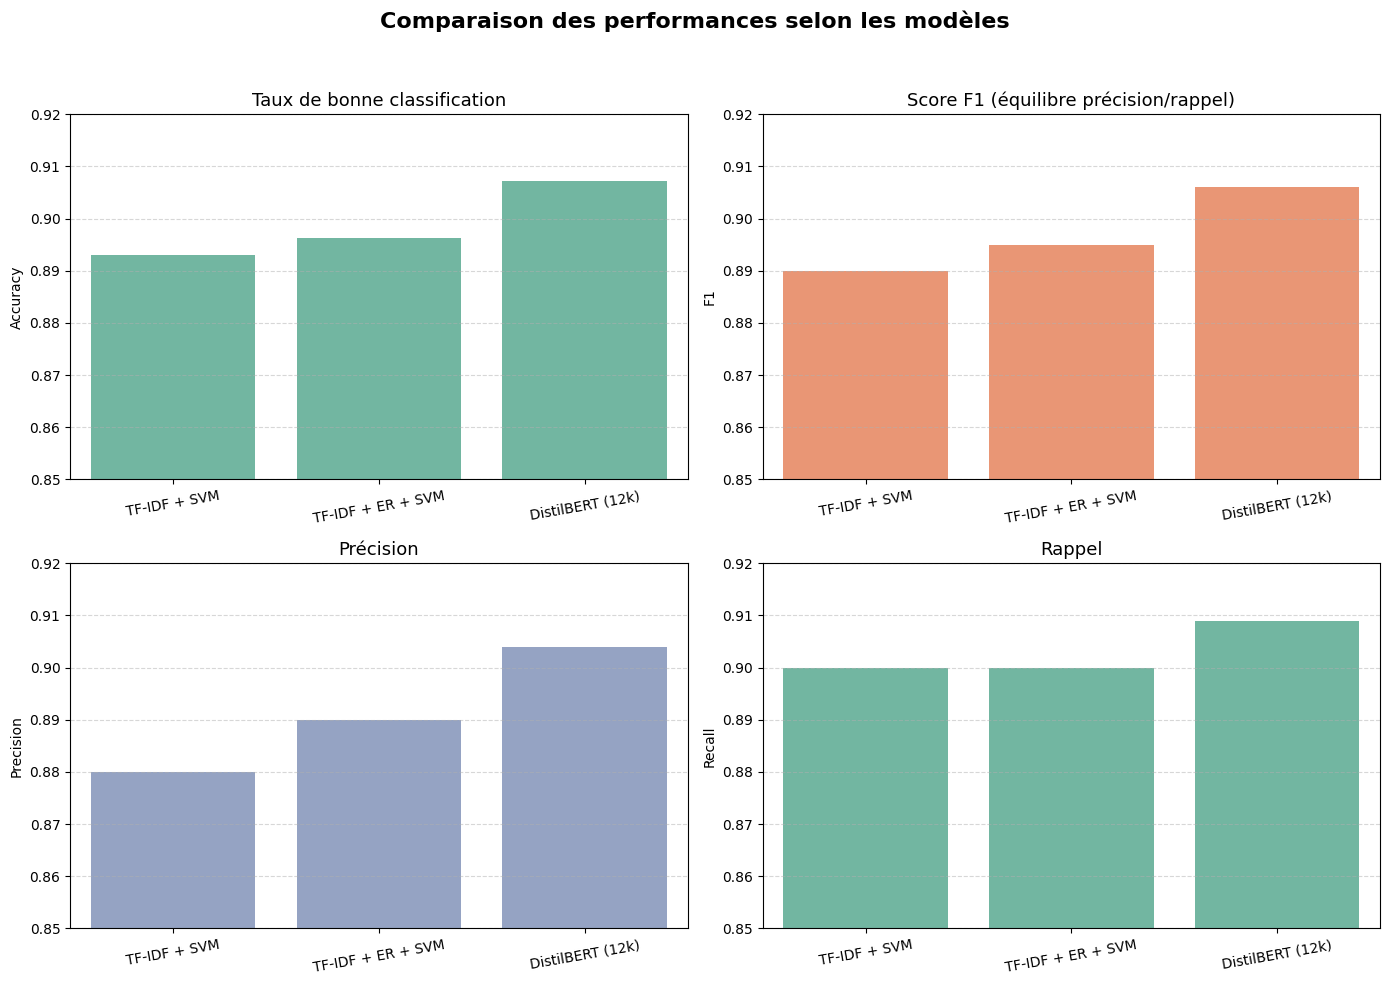

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Palette personnalis√©e
colors = sns.color_palette("Set2", n_colors=3)

# Cr√©er les sous-graphes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "F1", "Precision", "Recall"]
titles = {
    "Accuracy": "Taux de bonne classification",
    "F1": "Score F1 (√©quilibre pr√©cision/rappel)",
    "Precision": "Pr√©cision",
    "Recall": "Rappel"
}

for ax, metric, color in zip(axes.flatten(), metrics, colors * 2):
    sns.barplot(x="Mod√®le", y=metric, data=results, palette=[color]*3, ax=ax)
    ax.set_title(titles[metric], fontsize=13)
    ax.set_ylim(0.85, 0.92)
    ax.set_ylabel(metric)
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=10)
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.suptitle("Comparaison des performances selon les mod√®les", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Cette figure permet une lecture synth√©tique des performances compar√©es des trois mod√®les √©valu√©s dans ce projet : un SVM entra√Æn√© sur des vecteurs TF-IDF simples, le m√™me SVM enrichi avec les scores de polarit√© (er_score), et enfin un mod√®le DistilBERT fine-tun√© sur 12 000 exemples.

Sur le plan de l‚Äôaccuracy, on observe une progression r√©guli√®re : le SVM de base atteint 89,3‚ÄØ%, l‚Äôajout du score er_score am√©liore l√©g√®rement cette performance √† 89,6‚ÄØ%, tandis que DistilBERT franchit le seuil des 90‚ÄØ% avec une accuracy de 90,7‚ÄØ%. Ce gain traduit l‚Äôefficacit√© croissante des repr√©sentations utilis√©es : de simples vecteurs lexicaux, enrichis par une mesure affective externe, puis remplac√©s par des repr√©sentations contextuelles apprises.

Le score F1, qui mesure l‚Äô√©quilibre entre pr√©cision et rappel, suit la m√™me dynamique. Il passe de 0.890 pour le SVM simple √† 0.906 pour DistilBERT. Ce score est particuli√®rement important dans une t√¢che de classification binaire o√π les deux classes sont √©galement repr√©sent√©es, car il refl√®te la stabilit√© du mod√®le sur les cas ambigus ou les limites de classes.

La pr√©cision progresse de 88‚ÄØ% pour le mod√®le de base √† 90,4‚ÄØ% pour BERT, ce qui signifie que le mod√®le BERT fait significativement moins de faux positifs. En parall√®le, le rappel reste √©lev√© et stable autour de 90‚ÄØ% pour les deux premiers mod√®les, mais augmente encore avec BERT (90,9‚ÄØ%), ce qui indique qu‚Äôil est √©galement plus performant pour identifier correctement les critiques positives ou n√©gatives, sans les oublier.

Au global, ces visualisations montrent que l‚Äôajout du score ER dans SVM est utile mais limit√©, et que le passage √† un mod√®le contextualis√© comme DistilBERT permet de franchir un palier clair en termes de compr√©hension du langage et de pr√©cision pr√©dictive. Cela justifie pleinement l‚Äôint√©r√™t d‚Äôutiliser des mod√®les pr√©-entra√Æn√©s dans les t√¢ches modernes de classification de sentiment.

üü© Cas o√π les deux mod√®les ont raison : 8527

üü® Cas o√π seul BERT a raison : 608

üü¶ Cas o√π seul SVM a raison : 435

üü• Cas o√π les deux √©chouent : 430

Les r√©sultats montrent que dans la grande majorit√© des cas, les deux mod√®les parviennent √† pr√©dire correctement le label, avec plus de 8500 pr√©dictions communes justes. Cela confirme que les exemples les plus clairs sont bien capt√©s, quelle que soit l‚Äôapproche. Toutefois, BERT corrige 608 erreurs commises par SVM, tandis que l‚Äôinverse est vrai pour 435 cas seulement. Cela indique que BERT g√®re mieux les cas ambigus ou moins marqu√©s lexicalement, sans pour autant √™tre infaillible. Enfin, les deux mod√®les √©chouent ensemble sur environ 430 exemples, ce qui repr√©sente les cas les plus complexes du corpus. Ces r√©sultats confirment la sup√©riorit√© de BERT sur les situations difficiles, tout en montrant que SVM peut parfois mieux fonctionner sur des exemples √† structure lexicale forte mais hors distribution s√©mantique.

In [ ]:
#Results import from bert_finetuning


‚úÖ BERT corrige une erreur de SVM (exemples al√©atoires)
--------------------------------------------------
üéØ V√©rit√© : NEGATIVE
üîµ Pr√©diction BERT : NEGATIVE
üü† Pr√©diction SVM  : POSITIVE

seen enough little richard interviews performances enough poor leon pigeonholed musical bio pics know leon right actor role leon right david ruffin temptations fails utterly capture essence little richard film actor miguel n√∫√±ez played little richard fools fall love much suitable choice pulled musician powerful effeminate persona performances unconvincing film well happened glossed missed entirely lr forays homosexuality voyeurism temptations well capturing rise group warts film misses wide mark going director robert townsend started well hollywood shuffle talented funny guy delivered anything near first effort
----------------------------------------------------------------------------------------------------
üéØ V√©rit√© : POSITIVE
üîµ Pr√©diction BERT : POSITIVE
üü† Pr√©diction S

Les exemples analys√©s confirment les tendances observ√©es dans les statistiques globales. Lorsque BERT corrige une erreur commise par SVM, c‚Äôest souvent dans des cas o√π le texte est long, nuanc√©, parfois ironique ou complexe sur le plan √©motionnel. Le mod√®le BERT semble plus sensible au contexte et aux subtilit√©s s√©mantiques qui √©chappent au mod√®le lin√©aire. √Ä l‚Äôinverse, les erreurs corrig√©es par SVM mais pas par BERT concernent des textes o√π le vocabulaire est plus directement li√© √† la polarit√©, m√™me si la structure ou le ton est moins clair. Cela montre que SVM, bien que plus simple, peut encore rep√©rer des signaux lexicaux explicites que BERT interpr√®te diff√©remment. Enfin, les erreurs partag√©es par les deux mod√®les apparaissent dans des critiques ambig√ºes, o√π le ton est mal interpr√©t√© ou o√π l‚Äôopinion n‚Äôest pas clairement exprim√©e. Ces cas refl√®tent les limites communes des mod√®les, m√™me avanc√©s, face √† des formulations subjectives ou mal structur√©es.